
Actual coordinates
 
Train Set: (1282,2) 
Train Set after marker detection: (1090,2) 
Test Set: (906,2) 
Test Set  after marker detection: (848,2) 

Mean Absolute Error: 0.636446 [m]



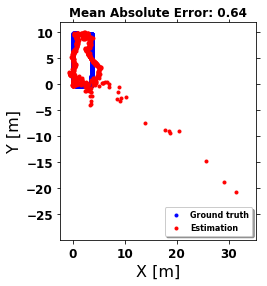

{'whiskers': [<matplotlib.lines.Line2D at 0x7f33f55888d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f33f5854ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f33f58474d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f33f56a1550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f33f56a1a50>],
 'means': []}

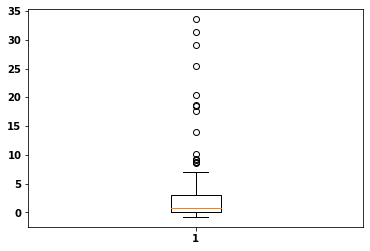

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plot

outputPath = '/hri/localdisk/ThesisProject/Kaushik/Kaushik/Testing_Sample_Script/160_side/'
trainSetCoordsPath = '/hri/localdisk/ThesisProject/Kaushik/Kaushik/Testing_Sample_Script/160_side/coordinates_train.txt'
testSetCoordsPath = '/hri/localdisk/ThesisProject/Kaushik/Kaushik/Testing_Sample_Script/160_side/coordinates_test.txt'
aruco = '160'
train_test_data = True

global testSet , testCoords
# aruco = np.array(aruco)
# m_id = str(aruco[0])
m_id = aruco
# Regression Degree
DEG = 2

# Train Set
# Slow Feature Values
trainSetPath = outputPath + '/Evaluation_Arrays/' + 'train_' + m_id + '_slowFeatures.npy'

# Marker detection results
detectionResultsTrainSetPath = outputPath + '/' + 'result_train.csv'

# Load Files
trainSet = np.load(trainSetPath)
trainSetCoords = np.loadtxt ( trainSetCoordsPath , delimiter = ',' , usecols = (4 , 5) )
# trainSetCoords = np.loadtxt(trainSetCoordsPath)[:, 0:2]
detectionResultsTrainSet = pd.read_csv ( detectionResultsTrainSetPath )

markerSquaresTrainSet = detectionResultsTrainSet [
    [ m_id + '_bb_x1' , m_id + '_bb_y1' , m_id + '_bb_x2' , m_id + '_bb_y2' , m_id + '_bb_x3' , m_id + '_bb_y3' , m_id +
      '_bb_x4' , m_id + '_bb_y4' ] ].values

# Keep only the coordinates with valid marker detection (Train/Test Set)
trainCoords = [ ]
for i in range ( trainSetCoords.shape [ 0 ] ) :
    if markerSquaresTrainSet [ i ].sum ( ) != 0 :
        trainCoords.append ( trainSetCoords [ i , : ] )
trainCoords = np.array ( trainCoords )

print ( "\nActual coordinates\n " )
print ( "Train Set: (%d,%d) " % trainSetCoords.shape )
print ( "Train Set after marker detection: (%d,%d) " % trainCoords.shape )

# Test set
if train_test_data :
    testSetPath = outputPath + '/Evaluation_Arrays/' + 'test_' + m_id + '_slowFeatures.npy'
    detectionResultsTestSetPath = outputPath + '/' + 'result_test.csv'
    testSet = np.load ( testSetPath )
    testSetCoords = np.loadtxt ( testSetCoordsPath , delimiter = ',' , usecols = (4 , 5) )
    # testSetCoords = np.loadtxt(testSetCoordsPath)[:, 0:2]
    detectionResultsTestSet = pd.read_csv ( detectionResultsTestSetPath )
    markerSquaresTestSet = detectionResultsTestSet [
        [ m_id + '_bb_x1' , m_id + '_bb_y1' , m_id + '_bb_x2' , m_id + '_bb_y2' , m_id + '_bb_x3' , m_id + '_bb_y3' ,
          m_id +
          '_bb_x4' , m_id + '_bb_y4' ] ].values
    testCoords = [ ]
    for i in range ( testSetCoords.shape [ 0 ] ) :
        if markerSquaresTestSet [ i ].sum ( ) != 0 :
            testCoords.append ( testSetCoords [ i , : ] )
    testCoords = np.array ( testCoords )
    print ( "Test Set: (%d,%d) " % testSetCoords.shape )
    print ( "Test Set  after marker detection: (%d,%d) " % testCoords.shape )

# Perform Regression
#####################################################
polyRegressor = PolynomialFeatures ( degree = DEG )
fig , ax = plt.subplots ( )

if train_test_data :
    polyFeatureTrainingSet = polyRegressor.fit_transform ( trainSet )
    polyFeaturesTestSet = polyRegressor.fit_transform ( testSet )

    regressor_x = LinearRegression ( )
    regressor_x.fit ( polyFeatureTrainingSet , trainCoords [ : , 0 ] )  # x-coordinates

    regressor_y = LinearRegression ( )
    regressor_y.fit ( polyFeatureTrainingSet , trainCoords [ : , 1 ] )  # y-coordinates

    predicted_X = regressor_x.predict ( polyFeaturesTestSet )
    predicted_Y = regressor_y.predict ( polyFeaturesTestSet )

    prediction_X = predicted_X.reshape ( predicted_X.shape [ 0 ] , 1 )
    prediction_Y = predicted_Y.reshape ( predicted_Y.shape [ 0 ] , 1 )
    predictedCoordinates = np.hstack ( [ prediction_X , prediction_Y ] )
    # Calculate Error
    ######################################################
    MAE = mean_absolute_error ( testCoords , predictedCoordinates )
    print ( "\nMean Absolute Error: %f [m]\n" % MAE )
    # Visualize
    ######################################################
    ax.plot ( testCoords [ : , 0 ] , testCoords [ : , 1 ] , 'b.' , lw = 1 , label = 'Ground truth' )
    ax.plot ( prediction_X , prediction_Y , 'r.' , lw = 1 , label = 'Estimation' )

else :
    polyFeatureTrainingSet = polyRegressor.fit_transform ( trainSet )
    # polyFeaturesTestSet = polyRegressor.fit_transform(testSet)

    X_train , X_test , y_train , y_test = train_test_split ( polyFeatureTrainingSet , trainCoords , test_size = 0.33 ,
                                                             random_state = 42 )

    regressor_x = LinearRegression ( )
    regressor_x.fit ( X_train , y_train [ : , 0 ] )  # x-coordinates

    regressor_y = LinearRegression ( )
    regressor_y.fit ( X_train , y_train [ : , 1 ] )  # y-coordinates

    predicted_X = regressor_x.predict ( X_test )
    predicted_Y = regressor_y.predict ( X_test )

    prediction_X = predicted_X.reshape ( predicted_X.shape [ 0 ] , 1 )
    prediction_Y = predicted_Y.reshape ( predicted_Y.shape [ 0 ] , 1 )
    predictedCoordinates = np.hstack ( [ prediction_X , prediction_Y ] )

    MAE = mean_absolute_error ( y_test , predictedCoordinates )
    print ( "\nMean Absolute Error: %f [m]\n" % MAE )

    ax.plot ( y_test [ : , 0 ] , y_test [ : , 1 ] , 'b.' , lw = 1 , label = 'Ground truth' )
    ax.plot ( prediction_X , prediction_Y , 'r.' , lw = 1 , label = 'Estimation' )

plt.title ( 'Mean Absolute Error: ' + "{:.2f}".format ( MAE ) , fontweight = 'bold' )
legend = ax.legend ( loc = 'lower right' , shadow = True )
plt.xlabel ( 'X [m]' , fontsize = 16 )
plt.ylabel ( 'Y [m]' , fontsize = 16 )
plt.tick_params ( top = 'off' , bottom = 'on' , left = 'on' , right = 'off' , labelleft = 'on' , labelbottom = 'on' )
plt.rc ( 'font' , weight = 'bold' )
plt.rc ( 'legend' , **{ 'fontsize' : 8 } )
plt.gca ( ).set_aspect ( 'equal' , adjustable = 'box' )
plt.tick_params ( labelsize = 12 )
plt.savefig ( outputPath + '/' + 'marker_' + m_id + '_result.pdf' , dpi = 1200 , bbox_inches = 'tight' )  # Save?
plt.show ( )

plot.boxplot(predicted_X)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f33f563fed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f33f53e3550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f33f563fdd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f33f53e3f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f33f53f34d0>],
 'means': []}

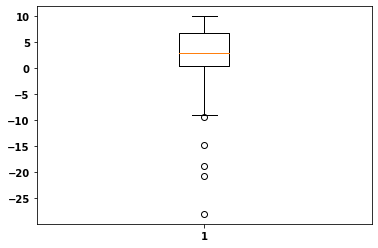

In [6]:
plot.boxplot(predicted_Y)


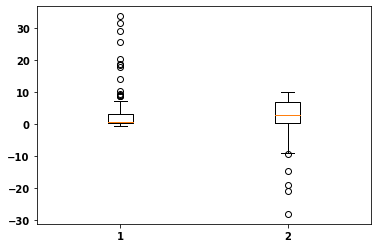

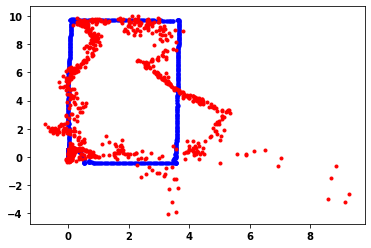

In [7]:
data = np.concatenate((prediction_X, prediction_Y), axis =1)

plot.boxplot(data)
plot.show()

dataset = pd.DataFrame({'X': data[:, 0], 'Y': data[:, 1]})

dataset_mod = dataset[(dataset['X']<10) & (dataset['Y']>-8)]

fig, ax = plt.subplots()
ax.plot(testCoords[:, 0], testCoords[:, 1], 'b.', lw=1, label='Ground truth')
ax.plot(dataset_mod['X'], dataset_mod['Y'], 'r.', lw=1, label='Estimation')